# Customer Satisfaction Prediction Machine Learning Project
**Project Overview**

The goal of this project is to predict customer satisfaction using historical data. This
involves using machine learning algorithms to analyze factors that influence customer
satisfaction and build a predictive model.

In [140]:
import pandas as pd
import numpy as np

In [141]:
df = pd.read_csv('/content/customer_support_tickets.csv')
df.sample(5)

,Ticket ID,Customer Name,Customer Email,Customer Age,Customer Gender,Product Purchased,Date of Purchase,Ticket Type,Ticket Subject,Ticket Description,Ticket Status,Resolution,Ticket Priority,Ticket Channel,First Response Time,Time to Resolution,Customer Satisfaction Rating
2918,2919,Heather Mccarty,jesus42@example.net,22,Female,Asus ROG,2021-05-14,Product inquiry,Account access,I'm facing issues logging into my {product_pur...,Pending Customer Response,NaN,Critical,Social media,2023-06-01 21:43:48,NaN,NaN
1637,1638,Melissa Blackwell,amanda60@example.org,49,Other,Canon DSLR Camera,2020-06-13,Technical issue,Cancellation request,I'm having an issue with the {product_purchase...,Pending Customer Response,NaN,Low,Social media,2023-06-01 04:47:11,NaN,NaN
8267,8268,Michael Murphy,wardmackenzie@example.com,26,Male,Asus ROG,2021-11-21,Product inquiry,Account access,I've forgotten my password for my {product_pur...,Open,NaN,High,Phone,NaN,NaN,NaN
1035,1036,Jonathan Chaney,antonio25@example.net,42,Other,Fitbit Charge,2020-06-15,Cancellation request,Display issue,I'm having an issue with the {product_purchase...,Pending Customer Response,NaN,High,Phone,2023-06-01 14:40:19,NaN,NaN
1247,1248,Wayne Shaw,andersondonald@example.com,38,Female,Nintendo Switch,2021-08-14,Refund request,Data loss,I'm having an issue with the {product_purchase...,Closed,Plant best car tough.,High,Social media,2023-06-01 21:10:23,2023-06-01 00:17:23,1.0


In [142]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8469 entries, 0 to 8468
Data columns (total 17 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Ticket ID                     8469 non-null   int64  
 1   Customer Name                 8469 non-null   object 
 2   Customer Email                8469 non-null   object 
 3   Customer Age                  8469 non-null   int64  
 4   Customer Gender               8469 non-null   object 
 5   Product Purchased             8469 non-null   object 
 6   Date of Purchase              8469 non-null   object 
 7   Ticket Type                   8469 non-null   object 
 8   Ticket Subject                8469 non-null   object 
 9   Ticket Description            8469 non-null   object 
 10  Ticket Status                 8469 non-null   object 
 11  Resolution                    2769 non-null   object 
 12  Ticket Priority               8469 non-null   object 
 13  Tic

In [143]:
df.shape

(8469, 17)

# 1. Data Preprocessing

In [144]:
# Check for missing values
df.isnull().sum()

,0
Ticket ID,0
Customer Name,0
Customer Email,0
Customer Age,0
Customer Gender,0
Product Purchased,0
Date of Purchase,0
Ticket Type,0
Ticket Subject,0
Ticket Description,0


In [145]:
# drop rows with missing target
df = df.dropna()

In [146]:
df.shape

(2769, 17)

In [147]:
# Check for duplicates
df.duplicated().sum()

np.int64(0)

In [148]:
# Drop columns that are irrelevant
columns = ['Customer Name', 'Customer Email']
df.drop(columns, axis=1, inplace=True)

In [149]:
# Convert date fields (First Response Time, Time to Resolution, date of purchase) to datetime.
df['First Response Time'] = pd.to_datetime(df['First Response Time'])
df['Time to Resolution'] = pd.to_datetime(df['Time to Resolution'])
df['Date of Purchase'] = pd.to_datetime(df['Time to Resolution'])

In [150]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2769 entries, 2 to 8467
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   Ticket ID                     2769 non-null   int64         
 1   Customer Age                  2769 non-null   int64         
 2   Customer Gender               2769 non-null   object        
 3   Product Purchased             2769 non-null   object        
 4   Date of Purchase              2769 non-null   datetime64[ns]
 5   Ticket Type                   2769 non-null   object        
 6   Ticket Subject                2769 non-null   object        
 7   Ticket Description            2769 non-null   object        
 8   Ticket Status                 2769 non-null   object        
 9   Resolution                    2769 non-null   object        
 10  Ticket Priority               2769 non-null   object        
 11  Ticket Channel                2769 

In [151]:
df.head()

,Ticket ID,Customer Age,Customer Gender,Product Purchased,Date of Purchase,Ticket Type,Ticket Subject,Ticket Description,Ticket Status,Resolution,Ticket Priority,Ticket Channel,First Response Time,Time to Resolution,Customer Satisfaction Rating
2,3,48,Other,Dell XPS,2023-06-01 18:05:38,Technical issue,Network problem,I'm facing a problem with my {product_purchase...,Closed,Case maybe show recently my computer follow.,Low,Social media,2023-06-01 11:14:38,2023-06-01 18:05:38,3.0
3,4,27,Female,Microsoft Office,2023-06-01 01:57:40,Billing inquiry,Account access,I'm having an issue with the {product_purchase...,Closed,Try capital clearly never color toward story.,Low,Social media,2023-06-01 07:29:40,2023-06-01 01:57:40,3.0
4,5,67,Female,Autodesk AutoCAD,2023-06-01 19:53:42,Billing inquiry,Data loss,I'm having an issue with the {product_purchase...,Closed,West decision evidence bit.,Low,Email,2023-06-01 00:12:42,2023-06-01 19:53:42,1.0
10,11,48,Male,Nintendo Switch,2023-05-31 23:51:49,Cancellation request,Data loss,I'm having an issue with the {product_purchase...,Closed,Measure tonight surface feel forward.,High,Phone,2023-06-01 17:46:49,2023-05-31 23:51:49,1.0
11,12,51,Male,Microsoft Xbox Controller,2023-06-01 09:27:51,Product inquiry,Software bug,I'm having an issue with the {product_purchase...,Closed,Measure there house management pick knowledge ...,High,Chat,2023-06-01 12:05:51,2023-06-01 09:27:51,1.0


# 2. Exploratory Data Analysis (EDA)


## Univariate EDA

In [152]:
import seaborn as sns
import matplotlib.pyplot as plt

In [153]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2769 entries, 2 to 8467
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   Ticket ID                     2769 non-null   int64         
 1   Customer Age                  2769 non-null   int64         
 2   Customer Gender               2769 non-null   object        
 3   Product Purchased             2769 non-null   object        
 4   Date of Purchase              2769 non-null   datetime64[ns]
 5   Ticket Type                   2769 non-null   object        
 6   Ticket Subject                2769 non-null   object        
 7   Ticket Description            2769 non-null   object        
 8   Ticket Status                 2769 non-null   object        
 9   Resolution                    2769 non-null   object        
 10  Ticket Priority               2769 non-null   object        
 11  Ticket Channel                2769 

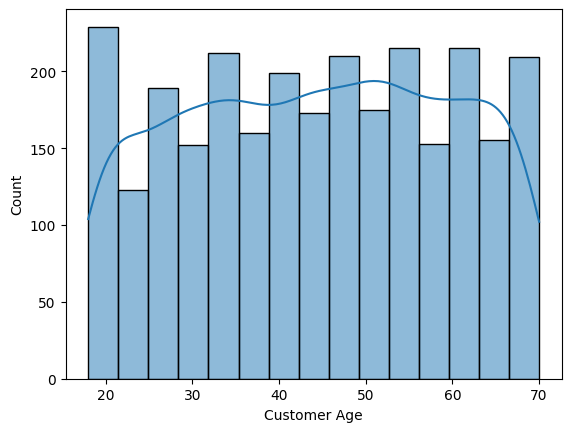

In [154]:
# age column
sns.histplot(df['Customer Age'], kde=True);

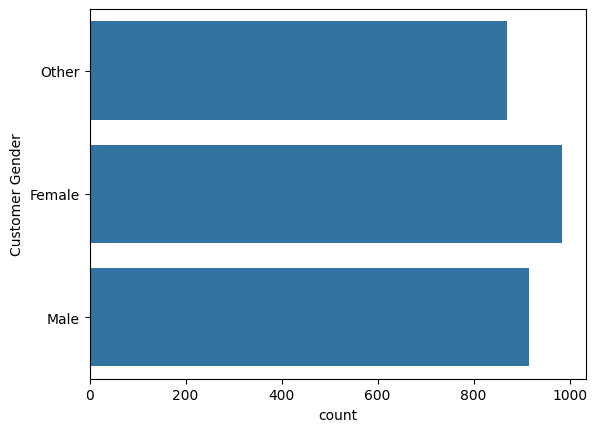

In [155]:
# customer gender column
sns.countplot(df['Customer Gender']);

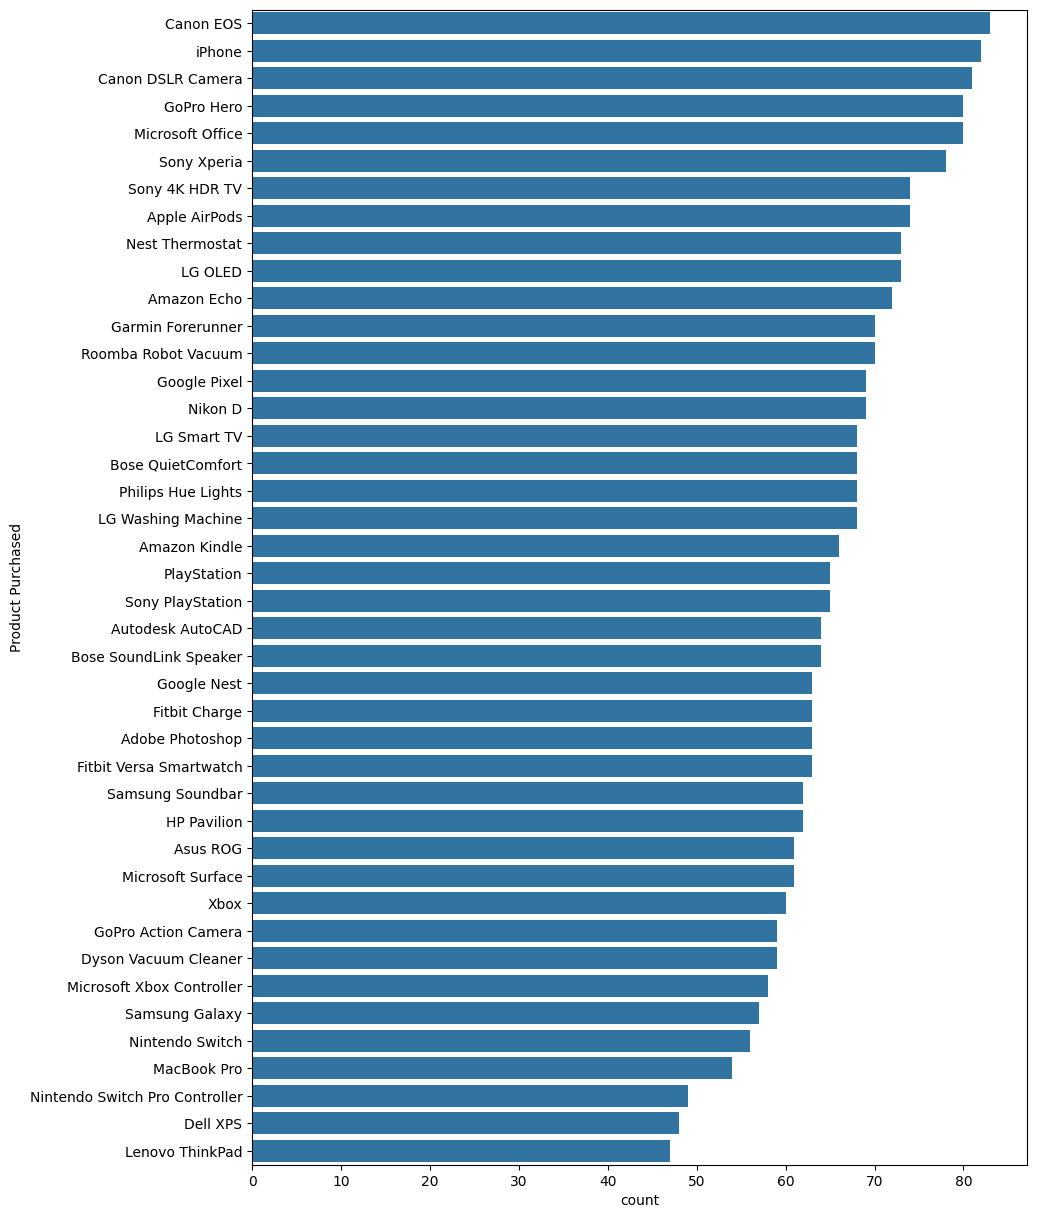

In [156]:
# Product Purchased column

plt.figure(figsize=(10,15))
# count occurences and sort values
sorted_categories = df['Product Purchased'].value_counts().index
# countplot with sorted values
sns.countplot(y=df['Product Purchased'], order=sorted_categories);

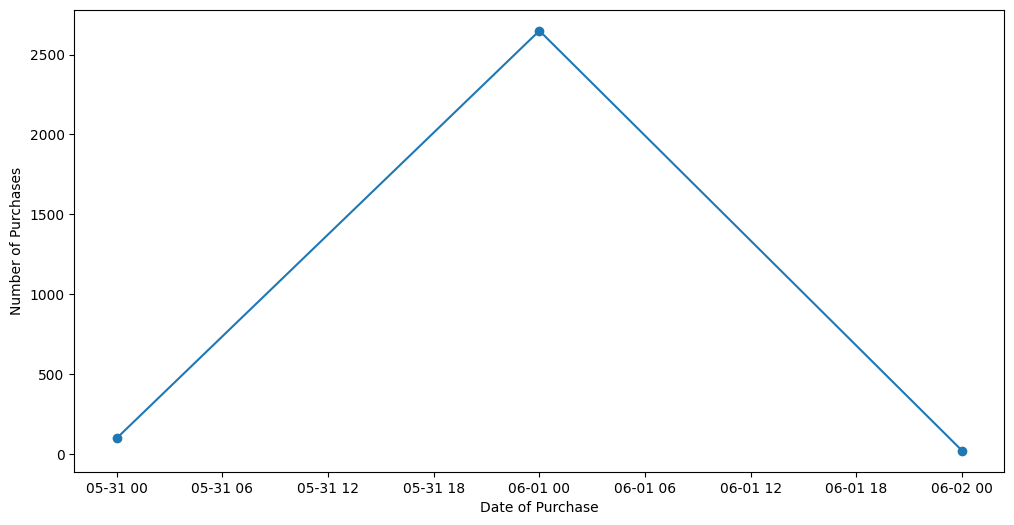

In [157]:
# Date of Purchase column

daily_counts = df['Date of Purchase'].dt.date.value_counts().sort_index()
plt.figure(figsize=(12,6))
plt.plot(daily_counts.index, daily_counts.values, marker='o');
plt.xlabel('Date of Purchase')
plt.ylabel('Number of Purchases');

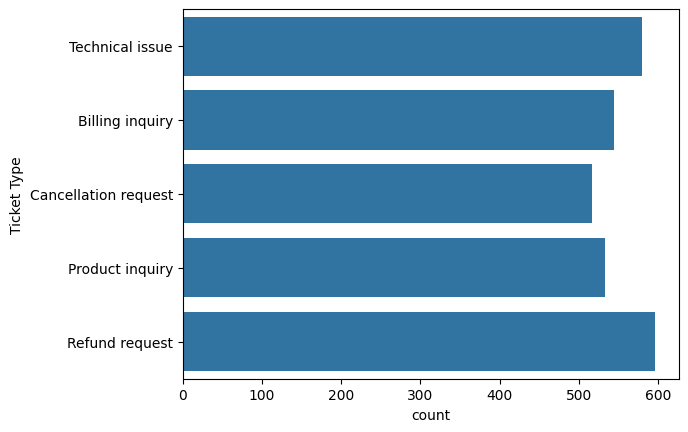

In [158]:
# Ticket Type column

sns.countplot(df['Ticket Type']);

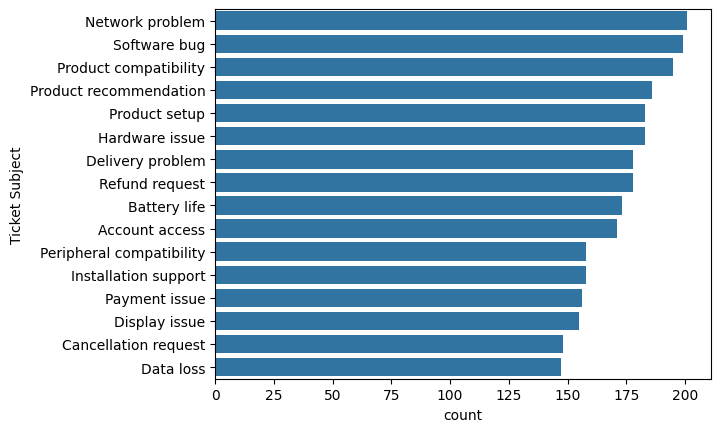

In [159]:
# Ticket Subject column

sorted_categories = df['Ticket Subject'].value_counts().index
sns.countplot(df['Ticket Subject'], order=sorted_categories);

In [160]:
# Ticket Description column
df['Ticket Description'].value_counts()

,count
Ticket Description,
"I'm having an issue with the {product_purchased}. Please assist. The issue I'm facing is intermittent. Sometimes it works fine, but other times it acts up unexpectedly.",12
I'm having an issue with the {product_purchased}. Please assist. I've noticed a peculiar error message popping up on my {product_purchased} screen. It says '{error_message}'. What does it mean?,10
"I'm having an issue with the {product_purchased}. Please assist. I've performed a factory reset on my {product_purchased}, hoping it would resolve the problem, but it didn't help.",9
I'm having an issue with the {product_purchased}. Please assist. I'm unable to find the option to perform the desired action in the {product_purchased}. Could you please guide me through the steps?,7
I'm having an issue with the {product_purchased}. Please assist. This problem started occurring after the recent software update. I haven't made any other changes to the device.,6
...,...
"I'm having an issue with the {product_purchased}. Please assist. Sorry if this is a problem. Please let me know.\n\nI use the {product_purchased} because I have so many ""tricks"" I've already contacted customer support multiple times, but the issue remains unresolved.",1
"I'm having an issue with the {product_purchased}. Please assist.\n\nI'm having an issue with the {product_purchased}. Please assist.\n\n\nI hope you understand the current situation, and that I have I've already contacted customer support multiple times, but the issue remains unresolved.",1
"I'm having an issue with the {product_purchased}. Please assist.\n\nThank you for any support you can provide, we've been in contact with the seller. This problem started occurring after the recent software update. I haven't made any other changes to the device.",1


In [161]:
# ticket status column
df['Ticket Status'].value_counts()

,count
Ticket Status,
Closed,2769


In [162]:
# Resolution column
df['Resolution'].value_counts().head(20)

,count
Resolution,
We seat culture plan.,1
Hot property or start.,1
Civil other course nature.,1
Song truth cultural audience trouble American.,1
Manager put north fight game national serve.,1
Event husband water decision.,1
Care herself pull others about cover reflect there.,1
Because individual section grow.,1
Party attack account day third.,1


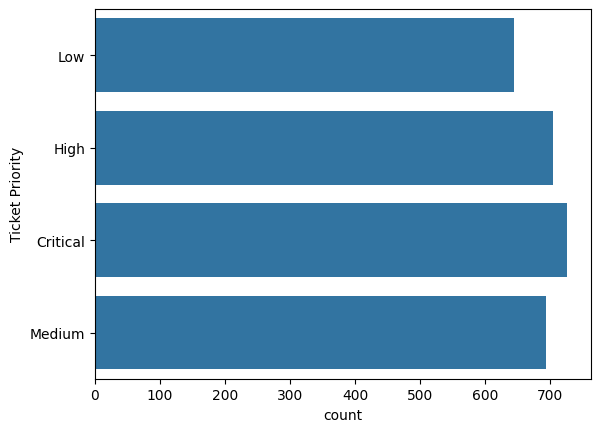

In [163]:
# Ticket Priority column
sns.countplot(df['Ticket Priority']);

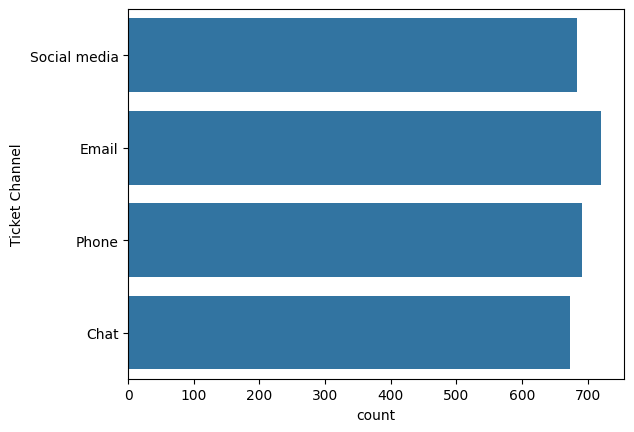

In [164]:
# Ticket Channel column
sns.countplot(df['Ticket Channel']);

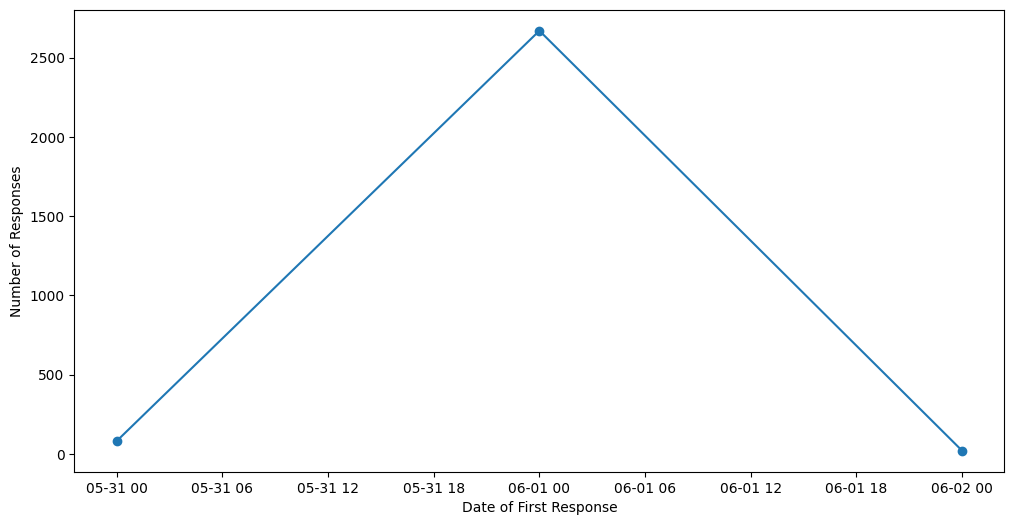

In [165]:
# First Response Time column
daily_counts = df['First Response Time'].dt.date.value_counts().sort_index()
plt.figure(figsize=(12,6))
plt.plot(daily_counts.index, daily_counts.values, marker='o');
plt.xlabel('Date of First Response')
plt.ylabel('Number of Responses');


In [166]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2769 entries, 2 to 8467
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   Ticket ID                     2769 non-null   int64         
 1   Customer Age                  2769 non-null   int64         
 2   Customer Gender               2769 non-null   object        
 3   Product Purchased             2769 non-null   object        
 4   Date of Purchase              2769 non-null   datetime64[ns]
 5   Ticket Type                   2769 non-null   object        
 6   Ticket Subject                2769 non-null   object        
 7   Ticket Description            2769 non-null   object        
 8   Ticket Status                 2769 non-null   object        
 9   Resolution                    2769 non-null   object        
 10  Ticket Priority               2769 non-null   object        
 11  Ticket Channel                2769 

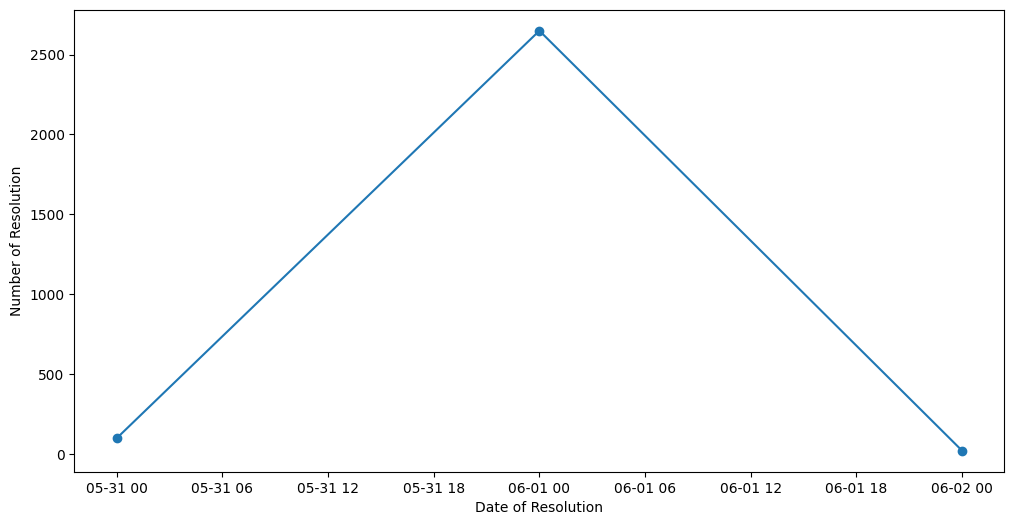

In [167]:
# Time to Resolution column
daily_counts = df['Time to Resolution'].dt.date.value_counts().sort_index()
plt.figure(figsize=(12,6))
plt.plot(daily_counts.index, daily_counts.values, marker='o');
plt.xlabel('Date of Resolution')
plt.ylabel('Number of Resolution');

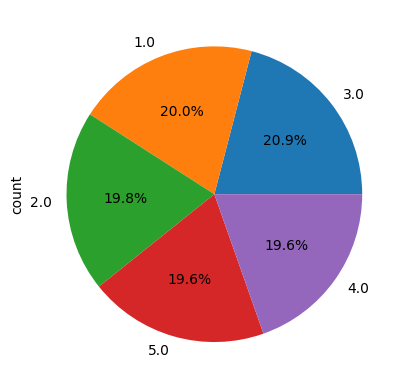

In [168]:
# Customer Satisfaction Rating column
df['Customer Satisfaction Rating'].value_counts().plot(kind='pie', autopct='%.1f%%');

**Rating	Meaning (Typical Interpretation)**

1	Very Dissatisfied (worst experience)

2	Dissatisfied

3	Neutral / Average experience

4	Satisfied

5	Very Satisfied (excellent experience)

## Bivariate and Multivariate Analysis

In [169]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2769 entries, 2 to 8467
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   Ticket ID                     2769 non-null   int64         
 1   Customer Age                  2769 non-null   int64         
 2   Customer Gender               2769 non-null   object        
 3   Product Purchased             2769 non-null   object        
 4   Date of Purchase              2769 non-null   datetime64[ns]
 5   Ticket Type                   2769 non-null   object        
 6   Ticket Subject                2769 non-null   object        
 7   Ticket Description            2769 non-null   object        
 8   Ticket Status                 2769 non-null   object        
 9   Resolution                    2769 non-null   object        
 10  Ticket Priority               2769 non-null   object        
 11  Ticket Channel                2769 

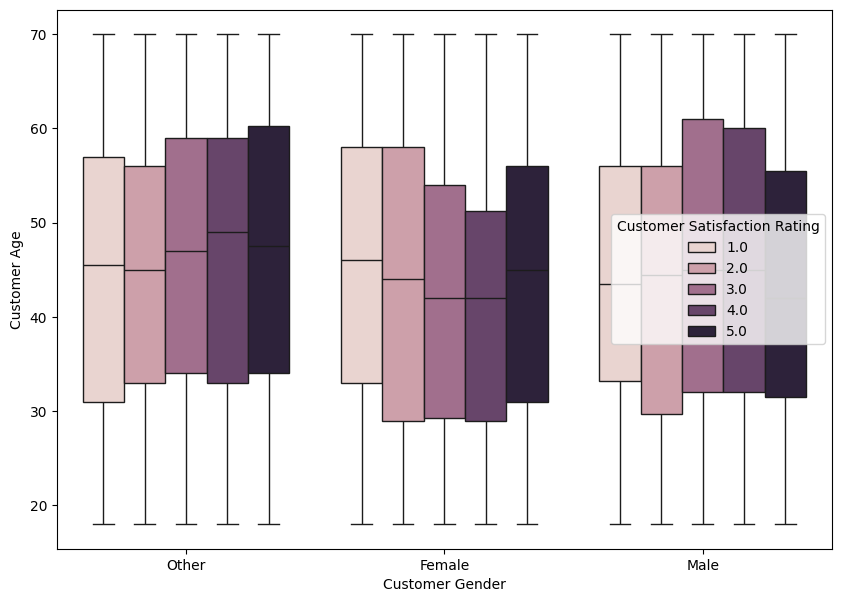

In [170]:
# customer age and customer gender
plt.figure(figsize=(10,7))
sns.boxplot(y=df['Customer Age'], x=df['Customer Gender'], hue=df['Customer Satisfaction Rating']);

In [171]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2769 entries, 2 to 8467
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   Ticket ID                     2769 non-null   int64         
 1   Customer Age                  2769 non-null   int64         
 2   Customer Gender               2769 non-null   object        
 3   Product Purchased             2769 non-null   object        
 4   Date of Purchase              2769 non-null   datetime64[ns]
 5   Ticket Type                   2769 non-null   object        
 6   Ticket Subject                2769 non-null   object        
 7   Ticket Description            2769 non-null   object        
 8   Ticket Status                 2769 non-null   object        
 9   Resolution                    2769 non-null   object        
 10  Ticket Priority               2769 non-null   object        
 11  Ticket Channel                2769 

#### Categorical Features vs. Target

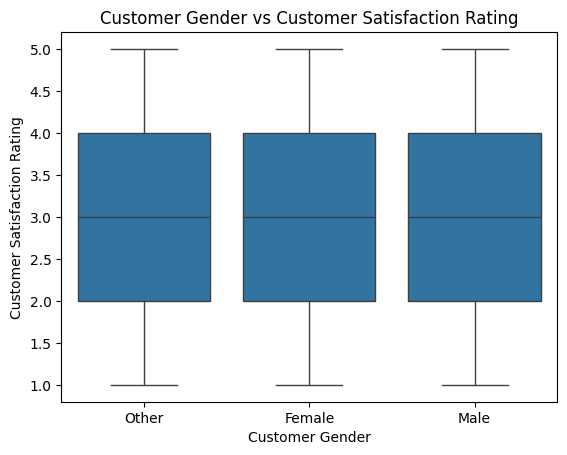

In [172]:
sns.boxplot(x='Customer Gender', y='Customer Satisfaction Rating', data=df);
plt.title("Customer Gender vs Customer Satisfaction Rating");

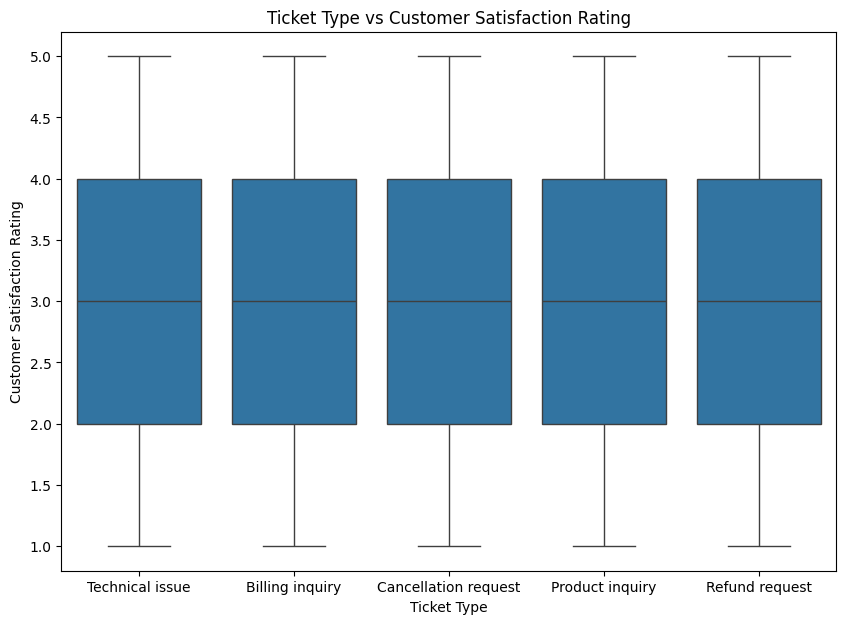

In [173]:
plt.figure(figsize=(10,7))
sns.boxplot(x='Ticket Type', y='Customer Satisfaction Rating', data=df);
plt.title("Ticket Type vs Customer Satisfaction Rating");

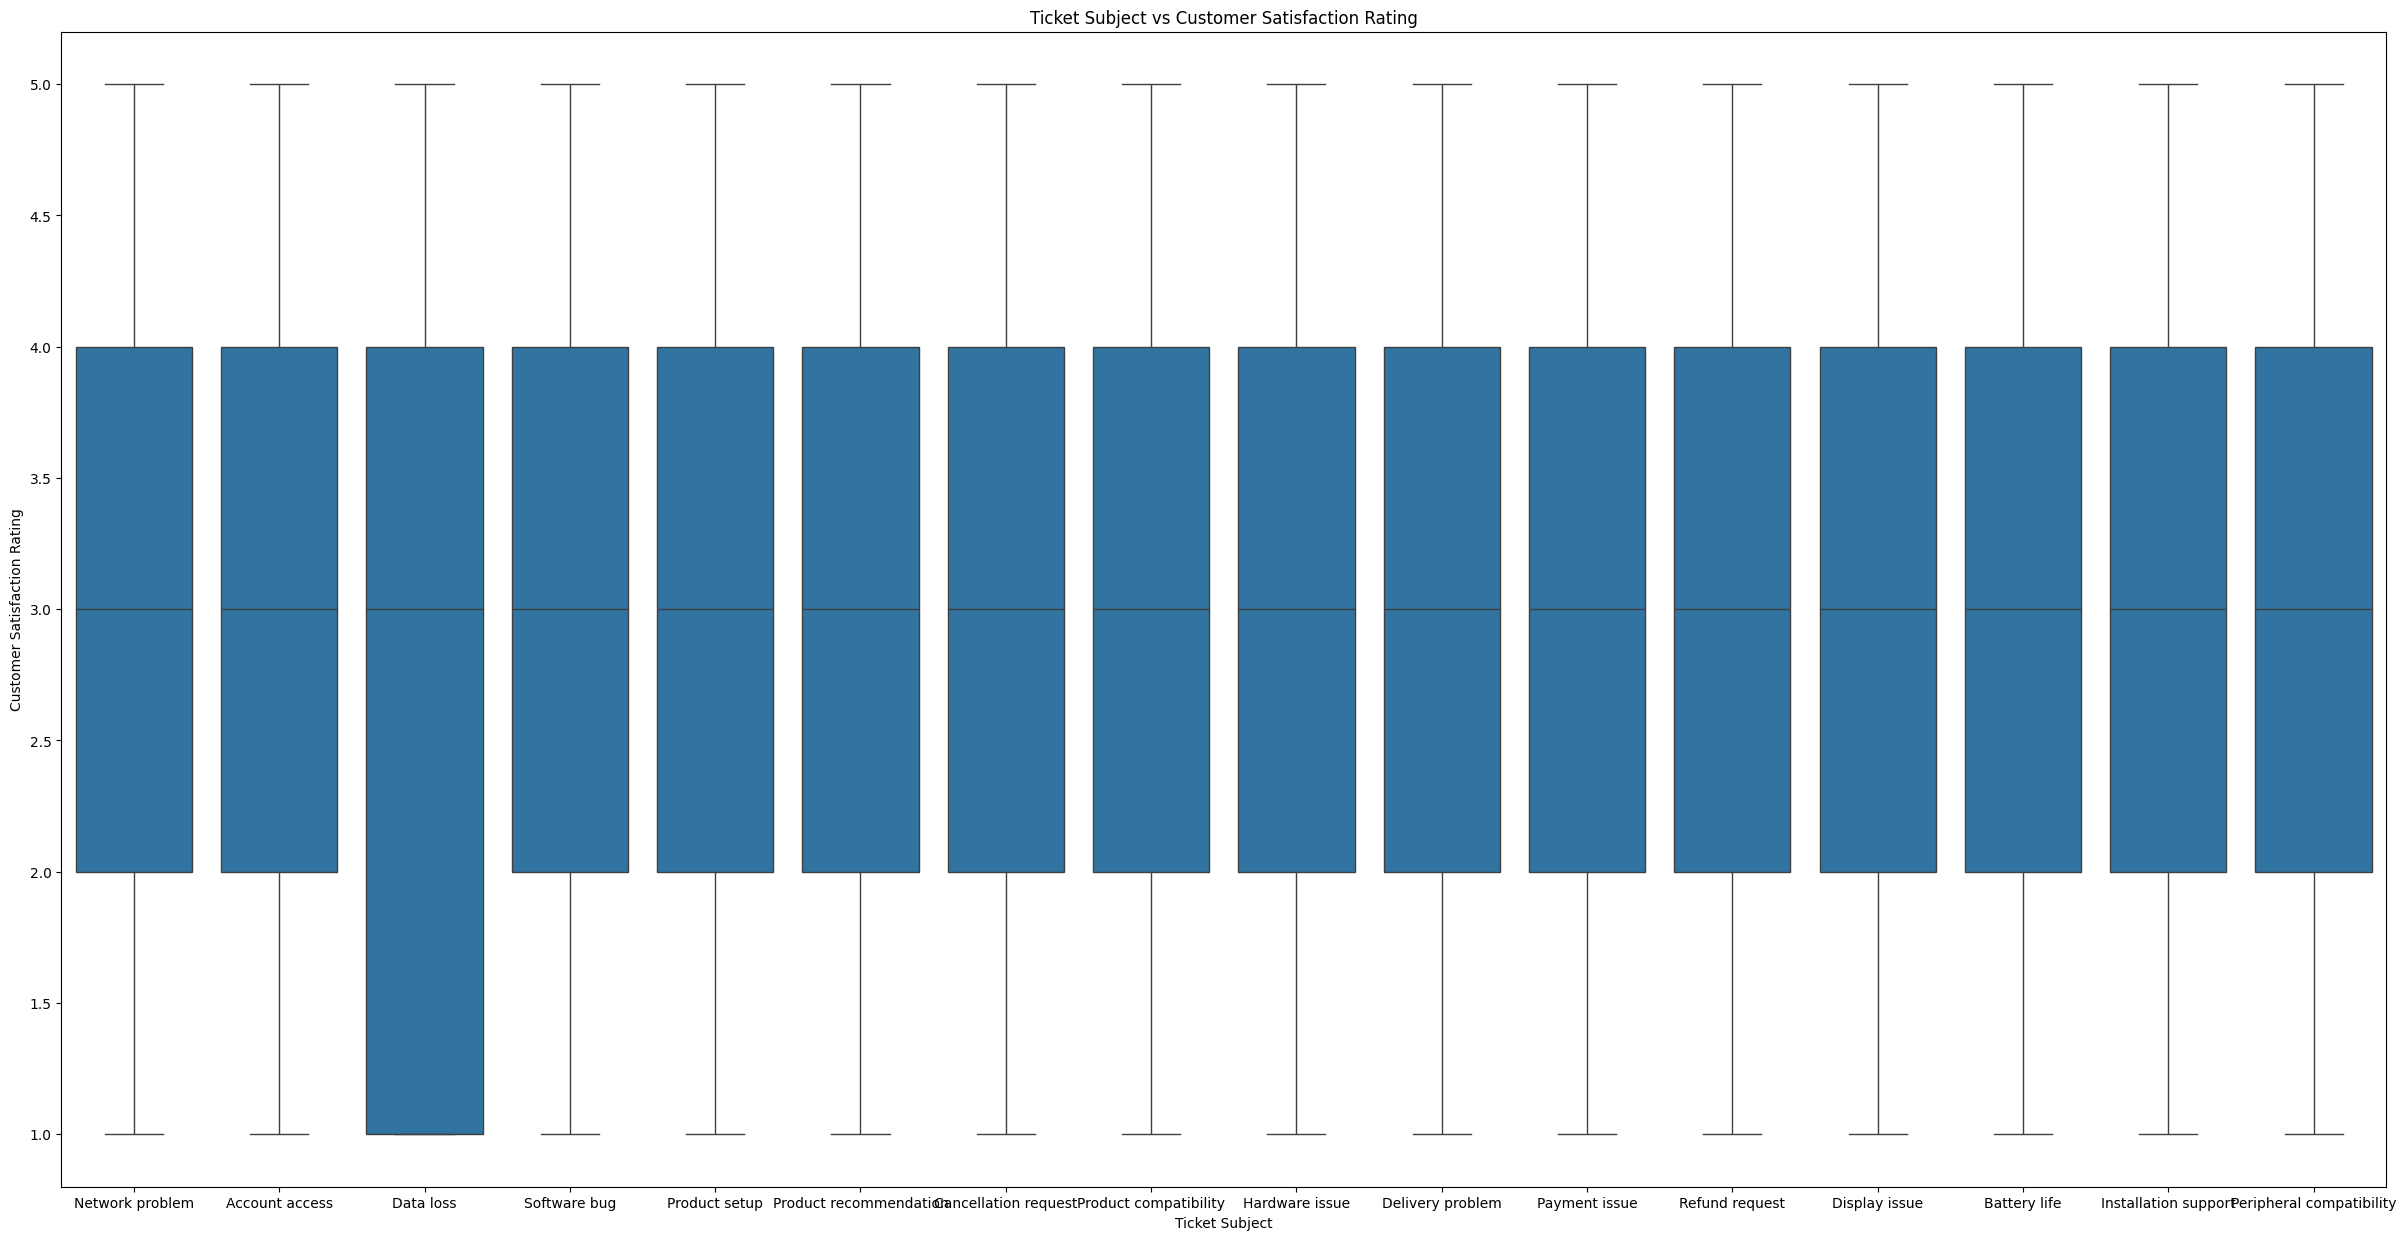

In [174]:
plt.figure(figsize=(30,15))
sns.boxplot(x='Ticket Subject', y='Customer Satisfaction Rating', data=df);
plt.title("Ticket Subject vs Customer Satisfaction Rating");

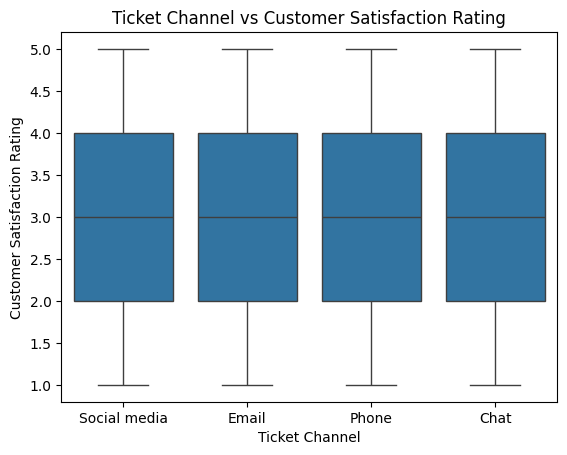

In [175]:
sns.boxplot(x='Ticket Channel', y='Customer Satisfaction Rating', data=df);
plt.title("Ticket Channel vs Customer Satisfaction Rating");

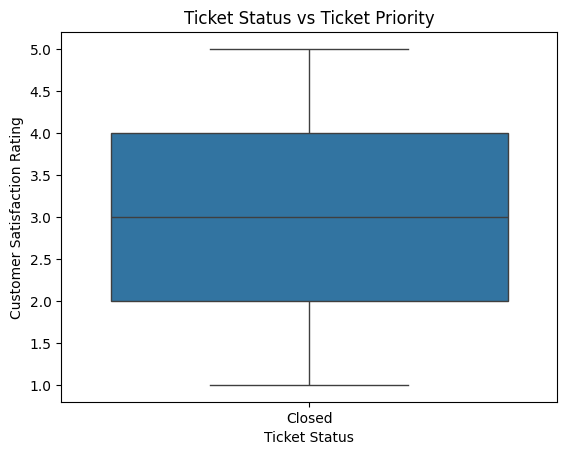

In [176]:
sns.boxplot(x='Ticket Status', y='Customer Satisfaction Rating', data=df)
plt.title("Ticket Status vs Ticket Priority");

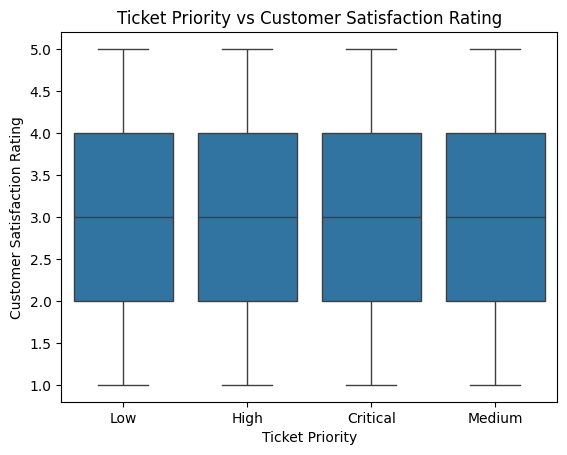

In [177]:
sns.boxplot(x='Ticket Priority', y='Customer Satisfaction Rating', data=df);
plt.title("Ticket Priority vs Customer Satisfaction Rating");

In [178]:
# age and target variable correlation
df[['Customer Age', 'Customer Satisfaction Rating']].corr()

,Customer Age,Customer Satisfaction Rating
Customer Age,1.0000,-0.0037
Customer Satisfaction Rating,-0.0037,1.0000


In [179]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2769 entries, 2 to 8467
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   Ticket ID                     2769 non-null   int64         
 1   Customer Age                  2769 non-null   int64         
 2   Customer Gender               2769 non-null   object        
 3   Product Purchased             2769 non-null   object        
 4   Date of Purchase              2769 non-null   datetime64[ns]
 5   Ticket Type                   2769 non-null   object        
 6   Ticket Subject                2769 non-null   object        
 7   Ticket Description            2769 non-null   object        
 8   Ticket Status                 2769 non-null   object        
 9   Resolution                    2769 non-null   object        
 10  Ticket Priority               2769 non-null   object        
 11  Ticket Channel                2769 

In [180]:
# ticket channel and gender
pd.crosstab(df['Ticket Status'], df['Customer Gender'])

Customer Gender,Female,Male,Other
Ticket Status,,,
Closed,984,916,869


In [181]:
pd.crosstab(df['Customer Satisfaction Rating'], df['Customer Gender'])

Customer Gender,Female,Male,Other
Customer Satisfaction Rating,,,
1.0,197,170,186
2.0,208,180,161
3.0,186,211,183
4.0,212,164,167
5.0,181,191,172


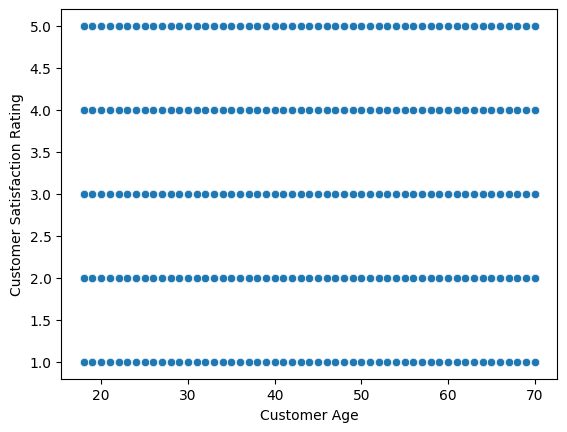

In [182]:
sns.scatterplot(data=df, x='Customer Age', y="Customer Satisfaction Rating");

# 3. Feature Engineering

In [183]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2769 entries, 2 to 8467
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   Ticket ID                     2769 non-null   int64         
 1   Customer Age                  2769 non-null   int64         
 2   Customer Gender               2769 non-null   object        
 3   Product Purchased             2769 non-null   object        
 4   Date of Purchase              2769 non-null   datetime64[ns]
 5   Ticket Type                   2769 non-null   object        
 6   Ticket Subject                2769 non-null   object        
 7   Ticket Description            2769 non-null   object        
 8   Ticket Status                 2769 non-null   object        
 9   Resolution                    2769 non-null   object        
 10  Ticket Priority               2769 non-null   object        
 11  Ticket Channel                2769 

In [184]:
# create time features
df['Resolution Time (hrs)'] = (df['Time to Resolution'] - df['First Response Time']).dt.total_seconds()/3600

In [185]:
df.sample(5)

,Ticket ID,Customer Age,Customer Gender,Product Purchased,Date of Purchase,Ticket Type,Ticket Subject,Ticket Description,Ticket Status,Resolution,Ticket Priority,Ticket Channel,First Response Time,Time to Resolution,Customer Satisfaction Rating,Resolution Time (hrs)
7939,7940,60,Male,iPhone,2023-06-01 06:37:06,Technical issue,Software bug,I'm having an issue with the {product_purchase...,Closed,Start traditional material occur stand any.,Low,Social media,2023-06-01 21:08:06,2023-06-01 06:37:06,5.0,-14.516667
7026,7027,20,Female,Dell XPS,2023-06-01 15:45:53,Technical issue,Network problem,I'm having an issue with the {product_purchase...,Closed,Soon read off surface run alone though.,Critical,Email,2023-06-01 04:15:53,2023-06-01 15:45:53,2.0,11.500000
2842,2843,39,Male,Nintendo Switch Pro Controller,2023-06-01 16:00:07,Billing inquiry,Peripheral compatibility,I'm having an issue with the {product_purchase...,Closed,Network within idea hard safe third piece.,Low,Phone,2023-06-01 07:25:07,2023-06-01 16:00:07,4.0,8.583333
1350,1351,46,Female,Google Pixel,2023-06-01 07:51:44,Technical issue,Product setup,I'm having an issue with the {product_purchase...,Closed,Develop effort bank task thousand door believe.,High,Social media,2023-06-01 18:37:44,2023-06-01 07:51:44,1.0,-10.766667
6384,6385,65,Male,Nest Thermostat,2023-06-01 00:42:18,Product inquiry,Account access,I'm having an issue with the {product_purchase...,Closed,Hotel big ago radio politics window trouble.,High,Chat,2023-06-01 03:54:18,2023-06-01 00:42:18,3.0,-3.200000


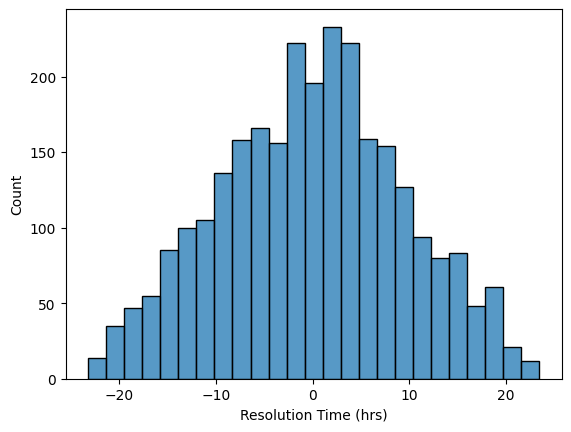

In [186]:
# plot distribution
sns.histplot(df['Resolution Time (hrs)']);

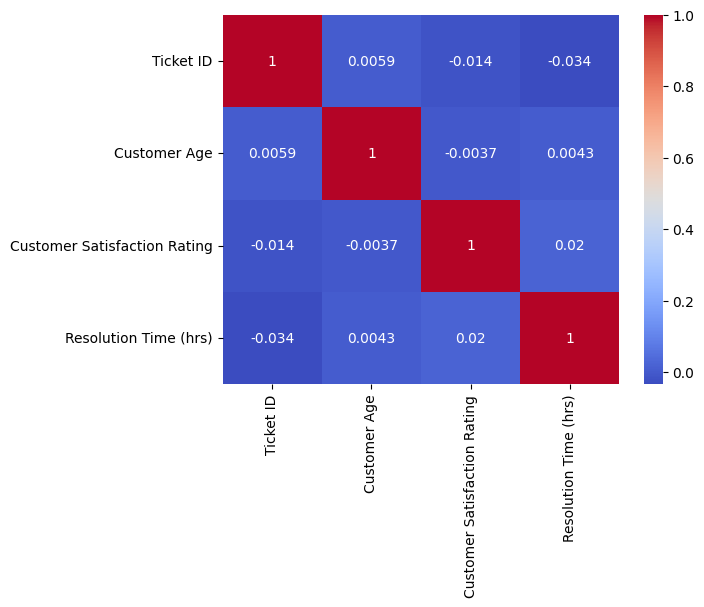

In [187]:
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm');

In [188]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2769 entries, 2 to 8467
Data columns (total 16 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   Ticket ID                     2769 non-null   int64         
 1   Customer Age                  2769 non-null   int64         
 2   Customer Gender               2769 non-null   object        
 3   Product Purchased             2769 non-null   object        
 4   Date of Purchase              2769 non-null   datetime64[ns]
 5   Ticket Type                   2769 non-null   object        
 6   Ticket Subject                2769 non-null   object        
 7   Ticket Description            2769 non-null   object        
 8   Ticket Status                 2769 non-null   object        
 9   Resolution                    2769 non-null   object        
 10  Ticket Priority               2769 non-null   object        
 11  Ticket Channel                2769 

In [189]:
# Extract length of text
df['Subject Length'] = df['Ticket Subject'].str.len()
df['Description Length'] = df['Ticket Description'].str.len()

In [190]:
# OHE on categorical variable
categorical_columns = ['Customer Gender', 'Ticket Type', 'Ticket Status', 'Ticket Priority', 'Ticket Subject', 'Ticket Channel']

encoded_df = pd.get_dummies(data=df,columns=categorical_columns, drop_first=True, dtype=int)

In [191]:
encoded_df.drop(columns=['Ticket ID', 'Customer Age', 'Product Purchased', 'Date of Purchase',
      'Ticket Description', 'Resolution',
       'First Response Time', 'Time to Resolution',
       'Customer Satisfaction Rating', 'Resolution Time (hrs)'], axis=1, inplace=True)
encoded_df

,Subject Length,Description Length,Customer Gender_Male,Customer Gender_Other,Ticket Type_Cancellation request,Ticket Type_Product inquiry,Ticket Type_Refund request,Ticket Type_Technical issue,Ticket Priority_High,Ticket Priority_Low,...,Ticket Subject_Payment issue,Ticket Subject_Peripheral compatibility,Ticket Subject_Product compatibility,Ticket Subject_Product recommendation,Ticket Subject_Product setup,Ticket Subject_Refund request,Ticket Subject_Software bug,Ticket Channel_Email,Ticket Channel_Phone,Ticket Channel_Social media
2,15,275,0,1,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,1
3,14,262,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
4,9,333,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
10,9,268,1,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
11,12,296,1,0,0,1,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8452,13,208,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
8453,24,326,0,1,0,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0
8455,14,283,0,1,0,0,0,0,1,0,...,0,0,0,0,0,1,0,1,0,0
8466,14,237,0,0,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,1


OHE is Done

In [192]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2769 entries, 2 to 8467
Data columns (total 18 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   Ticket ID                     2769 non-null   int64         
 1   Customer Age                  2769 non-null   int64         
 2   Customer Gender               2769 non-null   object        
 3   Product Purchased             2769 non-null   object        
 4   Date of Purchase              2769 non-null   datetime64[ns]
 5   Ticket Type                   2769 non-null   object        
 6   Ticket Subject                2769 non-null   object        
 7   Ticket Description            2769 non-null   object        
 8   Ticket Status                 2769 non-null   object        
 9   Resolution                    2769 non-null   object        
 10  Ticket Priority               2769 non-null   object        
 11  Ticket Channel                2769 

In [193]:
# lets concat two dataframes
df = pd.concat([df, encoded_df], axis=1)
df

,Ticket ID,Customer Age,Customer Gender,Product Purchased,Date of Purchase,Ticket Type,Ticket Subject,Ticket Description,Ticket Status,Resolution,...,Ticket Subject_Payment issue,Ticket Subject_Peripheral compatibility,Ticket Subject_Product compatibility,Ticket Subject_Product recommendation,Ticket Subject_Product setup,Ticket Subject_Refund request,Ticket Subject_Software bug,Ticket Channel_Email,Ticket Channel_Phone,Ticket Channel_Social media
2,3,48,Other,Dell XPS,2023-06-01 18:05:38,Technical issue,Network problem,I'm facing a problem with my {product_purchase...,Closed,Case maybe show recently my computer follow.,...,0,0,0,0,0,0,0,0,0,1
3,4,27,Female,Microsoft Office,2023-06-01 01:57:40,Billing inquiry,Account access,I'm having an issue with the {product_purchase...,Closed,Try capital clearly never color toward story.,...,0,0,0,0,0,0,0,0,0,1
4,5,67,Female,Autodesk AutoCAD,2023-06-01 19:53:42,Billing inquiry,Data loss,I'm having an issue with the {product_purchase...,Closed,West decision evidence bit.,...,0,0,0,0,0,0,0,1,0,0
10,11,48,Male,Nintendo Switch,2023-05-31 23:51:49,Cancellation request,Data loss,I'm having an issue with the {product_purchase...,Closed,Measure tonight surface feel forward.,...,0,0,0,0,0,0,0,0,1,0
11,12,51,Male,Microsoft Xbox Controller,2023-06-01 09:27:51,Product inquiry,Software bug,I'm having an issue with the {product_purchase...,Closed,Measure there house management pick knowledge ...,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8452,8453,62,Female,MacBook Pro,2023-06-01 05:47:05,Refund request,Display issue,I'm having an issue with the {product_purchase...,Closed,Interesting show must successful.,...,0,0,0,0,0,0,0,0,1,0
8453,8454,61,Other,iPhone,2023-06-01 04:45:06,Billing inquiry,Peripheral compatibility,The {product_purchased} is unable to establish...,Closed,Skill expect admit and.,...,0,1,0,0,0,0,0,0,0,0
8455,8456,54,Other,Dyson Vacuum Cleaner,2023-06-01 06:58:07,Billing inquiry,Refund request,"I've recently set up my {product_purchased}, b...",Closed,Say position key appear behavior.,...,0,0,0,0,0,1,0,1,0,0
8466,8467,57,Female,GoPro Action Camera,2023-06-01 04:31:22,Technical issue,Account access,I'm having an issue with the {product_purchase...,Closed,Eight account century nature kitchen.,...,0,0,0,0,0,0,0,0,0,1


In [194]:
# lets remove encoded column
df =df.drop(columns=categorical_columns, axis=1)
df

,Ticket ID,Customer Age,Product Purchased,Date of Purchase,Ticket Description,Resolution,First Response Time,Time to Resolution,Customer Satisfaction Rating,Resolution Time (hrs),...,Ticket Subject_Payment issue,Ticket Subject_Peripheral compatibility,Ticket Subject_Product compatibility,Ticket Subject_Product recommendation,Ticket Subject_Product setup,Ticket Subject_Refund request,Ticket Subject_Software bug,Ticket Channel_Email,Ticket Channel_Phone,Ticket Channel_Social media
2,3,48,Dell XPS,2023-06-01 18:05:38,I'm facing a problem with my {product_purchase...,Case maybe show recently my computer follow.,2023-06-01 11:14:38,2023-06-01 18:05:38,3.0,6.850000,...,0,0,0,0,0,0,0,0,0,1
3,4,27,Microsoft Office,2023-06-01 01:57:40,I'm having an issue with the {product_purchase...,Try capital clearly never color toward story.,2023-06-01 07:29:40,2023-06-01 01:57:40,3.0,-5.533333,...,0,0,0,0,0,0,0,0,0,1
4,5,67,Autodesk AutoCAD,2023-06-01 19:53:42,I'm having an issue with the {product_purchase...,West decision evidence bit.,2023-06-01 00:12:42,2023-06-01 19:53:42,1.0,19.683333,...,0,0,0,0,0,0,0,1,0,0
10,11,48,Nintendo Switch,2023-05-31 23:51:49,I'm having an issue with the {product_purchase...,Measure tonight surface feel forward.,2023-06-01 17:46:49,2023-05-31 23:51:49,1.0,-17.916667,...,0,0,0,0,0,0,0,0,1,0
11,12,51,Microsoft Xbox Controller,2023-06-01 09:27:51,I'm having an issue with the {product_purchase...,Measure there house management pick knowledge ...,2023-06-01 12:05:51,2023-06-01 09:27:51,1.0,-2.633333,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8452,8453,62,MacBook Pro,2023-06-01 05:47:05,I'm having an issue with the {product_purchase...,Interesting show must successful.,2023-06-01 14:14:05,2023-06-01 05:47:05,3.0,-8.450000,...,0,0,0,0,0,0,0,0,1,0
8453,8454,61,iPhone,2023-06-01 04:45:06,The {product_purchased} is unable to establish...,Skill expect admit and.,2023-06-01 12:56:06,2023-06-01 04:45:06,5.0,-8.183333,...,0,1,0,0,0,0,0,0,0,0
8455,8456,54,Dyson Vacuum Cleaner,2023-06-01 06:58:07,"I've recently set up my {product_purchased}, b...",Say position key appear behavior.,2023-06-01 14:15:07,2023-06-01 06:58:07,1.0,-7.283333,...,0,0,0,0,0,1,0,1,0,0
8466,8467,57,GoPro Action Camera,2023-06-01 04:31:22,I'm having an issue with the {product_purchase...,Eight account century nature kitchen.,2023-06-01 09:44:22,2023-06-01 04:31:22,3.0,-5.216667,...,0,0,0,0,0,0,0,0,0,1


In [195]:
# Extract useful info from Date of purchase column
df['Day of Purchase'] = df['Date of Purchase'].dt.day
df['Month of Purchase'] = df['Date of Purchase'].dt.month
df['Year of Purchase'] = df['Date of Purchase'].dt.year

# now drop this col
df.drop(columns=['Date of Purchase'], axis=1, inplace=True)
df.head()

,Ticket ID,Customer Age,Product Purchased,Ticket Description,Resolution,First Response Time,Time to Resolution,Customer Satisfaction Rating,Resolution Time (hrs),Subject Length,...,Ticket Subject_Product recommendation,Ticket Subject_Product setup,Ticket Subject_Refund request,Ticket Subject_Software bug,Ticket Channel_Email,Ticket Channel_Phone,Ticket Channel_Social media,Day of Purchase,Month of Purchase,Year of Purchase
2,3,48,Dell XPS,I'm facing a problem with my {product_purchase...,Case maybe show recently my computer follow.,2023-06-01 11:14:38,2023-06-01 18:05:38,3.0,6.850000,15,...,0,0,0,0,0,0,1,1,6,2023
3,4,27,Microsoft Office,I'm having an issue with the {product_purchase...,Try capital clearly never color toward story.,2023-06-01 07:29:40,2023-06-01 01:57:40,3.0,-5.533333,14,...,0,0,0,0,0,0,1,1,6,2023
4,5,67,Autodesk AutoCAD,I'm having an issue with the {product_purchase...,West decision evidence bit.,2023-06-01 00:12:42,2023-06-01 19:53:42,1.0,19.683333,9,...,0,0,0,0,1,0,0,1,6,2023
10,11,48,Nintendo Switch,I'm having an issue with the {product_purchase...,Measure tonight surface feel forward.,2023-06-01 17:46:49,2023-05-31 23:51:49,1.0,-17.916667,9,...,0,0,0,0,0,1,0,31,5,2023
11,12,51,Microsoft Xbox Controller,I'm having an issue with the {product_purchase...,Measure there house management pick knowledge ...,2023-06-01 12:05:51,2023-06-01 09:27:51,1.0,-2.633333,12,...,0,0,0,1,0,0,0,1,6,2023


In [196]:
df['Product Purchased'].unique()

array(['Dell XPS', 'Microsoft Office', 'Autodesk AutoCAD',
       'Nintendo Switch', 'Microsoft Xbox Controller', 'Sony PlayStation',
       'Xbox', 'Canon EOS', 'Fitbit Charge', 'GoPro Action Camera',
       'GoPro Hero', 'Google Pixel', 'HP Pavilion',
       'Nintendo Switch Pro Controller', 'LG Smart TV', 'Nest Thermostat',
       'Apple AirPods', 'Sony 4K HDR TV', 'Canon DSLR Camera',
       'Dyson Vacuum Cleaner', 'Roomba Robot Vacuum', 'PlayStation',
       'Sony Xperia', 'Samsung Galaxy', 'Asus ROG', 'Amazon Echo',
       'iPhone', 'Google Nest', 'Adobe Photoshop', 'LG Washing Machine',
       'Philips Hue Lights', 'Bose SoundLink Speaker',
       'Garmin Forerunner', 'Samsung Soundbar', 'MacBook Pro',
       'Microsoft Surface', 'LG OLED', 'Amazon Kindle',
       'Bose QuietComfort', 'Fitbit Versa Smartwatch', 'Lenovo ThinkPad',
       'Nikon D'], dtype=object)

Group `Product Purchased` into categories

In [197]:
product_category_mapping = {
    'Dell XPS': 'Laptop',
    'MacBook Pro': 'Laptop',
    'HP Pavilion': 'Laptop',
    'Lenovo ThinkPad': 'Laptop',
    'Asus ROG': 'Laptop',
    'Microsoft Surface': 'Laptop',

    'iPhone': 'Smartphone',
    'Samsung Galaxy': 'Smartphone',
    'Google Pixel': 'Smartphone',
    'Sony Xperia': 'Smartphone',

    'Microsoft Office': 'Software',
    'Adobe Photoshop': 'Software',
    'Autodesk AutoCAD': 'Software',

    'Nest Thermostat': 'Smart Home',
    'Google Nest': 'Smart Home',
    'Amazon Echo': 'Smart Home',
    'Philips Hue Lights': 'Smart Home',

    'Apple AirPods': 'Audio',
    'Bose SoundLink Speaker': 'Audio',
    'Bose QuietComfort': 'Audio',
    'Samsung Soundbar': 'Audio',

    'Fitbit Charge': 'Wearable',
    'Fitbit Versa Smartwatch': 'Wearable',
    'Garmin Forerunner': 'Wearable',

    'Nintendo Switch': 'Gaming Console',
    'Nintendo Switch Pro Controller': 'Gaming Console',
    'Microsoft Xbox Controller': 'Gaming Console',
    'Sony PlayStation': 'Gaming Console',
    'PlayStation': 'Gaming Console',
    'Xbox': 'Gaming Console',

    'GoPro Action Camera': 'Camera',
    'GoPro Hero': 'Camera',
    'Canon EOS': 'Camera',
    'Canon DSLR Camera': 'Camera',
    'Nikon D': 'Camera',

    'LG Smart TV': 'TV',
    'Sony 4K HDR TV': 'TV',
    'LG OLED': 'TV',

    'Roomba Robot Vacuum': 'Home Appliance',
    'Dyson Vacuum Cleaner': 'Home Appliance',
    'LG Washing Machine': 'Home Appliance',

    'Amazon Kindle': 'E-Reader'
}

# apply a mapping to create a new column
df['Product Category'] = df['Product Purchased'].map(product_category_mapping)

# handle unmapped values
df['Product Category'] = df['Product Category'].fillna('Other')

# drop the original column
df.drop(columns=['Product Purchased'], axis=1, inplace=True)

df.head()

,Ticket ID,Customer Age,Ticket Description,Resolution,First Response Time,Time to Resolution,Customer Satisfaction Rating,Resolution Time (hrs),Subject Length,Description Length,...,Ticket Subject_Product setup,Ticket Subject_Refund request,Ticket Subject_Software bug,Ticket Channel_Email,Ticket Channel_Phone,Ticket Channel_Social media,Day of Purchase,Month of Purchase,Year of Purchase,Product Category
2,3,48,I'm facing a problem with my {product_purchase...,Case maybe show recently my computer follow.,2023-06-01 11:14:38,2023-06-01 18:05:38,3.0,6.850000,15,275,...,0,0,0,0,0,1,1,6,2023,Laptop
3,4,27,I'm having an issue with the {product_purchase...,Try capital clearly never color toward story.,2023-06-01 07:29:40,2023-06-01 01:57:40,3.0,-5.533333,14,262,...,0,0,0,0,0,1,1,6,2023,Software
4,5,67,I'm having an issue with the {product_purchase...,West decision evidence bit.,2023-06-01 00:12:42,2023-06-01 19:53:42,1.0,19.683333,9,333,...,0,0,0,1,0,0,1,6,2023,Software
10,11,48,I'm having an issue with the {product_purchase...,Measure tonight surface feel forward.,2023-06-01 17:46:49,2023-05-31 23:51:49,1.0,-17.916667,9,268,...,0,0,0,0,1,0,31,5,2023,Gaming Console
11,12,51,I'm having an issue with the {product_purchase...,Measure there house management pick knowledge ...,2023-06-01 12:05:51,2023-06-01 09:27:51,1.0,-2.633333,12,296,...,0,0,1,0,0,0,1,6,2023,Gaming Console


In [198]:
df['Product Category'].unique()

array(['Laptop', 'Software', 'Gaming Console', 'Camera', 'Wearable',
       'Smartphone', 'TV', 'Smart Home', 'Audio', 'Home Appliance',
       'E-Reader'], dtype=object)

In [199]:
# apply OneHotEncoding to this column
encoded_df = pd.get_dummies(data=df['Product Category'], dtype='int', drop_first=True)

# concat it
df = pd.concat([df, encoded_df], axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2769 entries, 2 to 8467
Data columns (total 53 columns):
 #   Column                                   Non-Null Count  Dtype         
---  ------                                   --------------  -----         
 0   Ticket ID                                2769 non-null   int64         
 1   Customer Age                             2769 non-null   int64         
 2   Ticket Description                       2769 non-null   object        
 3   Resolution                               2769 non-null   object        
 4   First Response Time                      2769 non-null   datetime64[ns]
 5   Time to Resolution                       2769 non-null   datetime64[ns]
 6   Customer Satisfaction Rating             2769 non-null   float64       
 7   Resolution Time (hrs)                    2769 non-null   float64       
 8   Subject Length                           2769 non-null   int64         
 9   Description Length                       2769 

`Ticket Description` Column

In [200]:
df['Ticket Description'].values

array(["I'm facing a problem with my {product_purchased}. The {product_purchased} is not turning on. It was working fine until yesterday, but now it doesn't respond.\n\n1.8.3 I really I'm using the original charger that came with my {product_purchased}, but it's not charging properly.",
       "I'm having an issue with the {product_purchased}. Please assist.\n\nIf you have a problem you're interested in and I'd love to see this happen, please check out the Feedback. I've already contacted customer support multiple times, but the issue remains unresolved.",
       "I'm having an issue with the {product_purchased}. Please assist.\n\n\nNote: The seller is not responsible for any damages arising out of the delivery of the battleground game. Please have the game in good condition and shipped to you I've noticed a sudden decrease in battery life on my {product_purchased}. It used to last much longer.",
       ...,
       "I've recently set up my {product_purchased}, but it fails to connect t

In [201]:
# Clean the text
import re
def clean_text(text):
  text = str(text).lower()
  text = re.sub(r'\{.*?\}', '', text) # remove placeholders
  text = re.sub(r'[^a-zA-Z\s]', '', text) #remove punctuation/numbers
  text = re.sub(r'\s+', ' ', text).strip()
  return text

df['Cleaned Description'] = df['Ticket Description'].apply(clean_text)
df

,Ticket ID,Customer Age,Ticket Description,Resolution,First Response Time,Time to Resolution,Customer Satisfaction Rating,Resolution Time (hrs),Subject Length,Description Length,...,E-Reader,Gaming Console,Home Appliance,Laptop,Smart Home,Smartphone,Software,TV,Wearable,Cleaned Description
2,3,48,I'm facing a problem with my {product_purchase...,Case maybe show recently my computer follow.,2023-06-01 11:14:38,2023-06-01 18:05:38,3.0,6.850000,15,275,...,0,0,0,1,0,0,0,0,0,im facing a problem with my the is not turning...
3,4,27,I'm having an issue with the {product_purchase...,Try capital clearly never color toward story.,2023-06-01 07:29:40,2023-06-01 01:57:40,3.0,-5.533333,14,262,...,0,0,0,0,0,0,1,0,0,im having an issue with the please assist if y...
4,5,67,I'm having an issue with the {product_purchase...,West decision evidence bit.,2023-06-01 00:12:42,2023-06-01 19:53:42,1.0,19.683333,9,333,...,0,0,0,0,0,0,1,0,0,im having an issue with the please assist note...
10,11,48,I'm having an issue with the {product_purchase...,Measure tonight surface feel forward.,2023-06-01 17:46:49,2023-05-31 23:51:49,1.0,-17.916667,9,268,...,0,1,0,0,0,0,0,0,0,im having an issue with the please assist prod...
11,12,51,I'm having an issue with the {product_purchase...,Measure there house management pick knowledge ...,2023-06-01 12:05:51,2023-06-01 09:27:51,1.0,-2.633333,12,296,...,0,1,0,0,0,0,0,0,0,im having an issue with the please assist it i...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8452,8453,62,I'm having an issue with the {product_purchase...,Interesting show must successful.,2023-06-01 14:14:05,2023-06-01 05:47:05,3.0,-8.450000,13,208,...,0,0,0,1,0,0,0,0,0,im having an issue with the please assist of m...
8453,8454,61,The {product_purchased} is unable to establish...,Skill expect admit and.,2023-06-01 12:56:06,2023-06-01 04:45:06,5.0,-8.183333,24,326,...,0,0,0,0,0,1,0,0,0,the is unable to establish a stable internet c...
8455,8456,54,"I've recently set up my {product_purchased}, b...",Say position key appear behavior.,2023-06-01 14:15:07,2023-06-01 06:58:07,1.0,-7.283333,14,283,...,0,0,1,0,0,0,0,0,0,ive recently set up my but it fails to connect...
8466,8467,57,I'm having an issue with the {product_purchase...,Eight account century nature kitchen.,2023-06-01 09:44:22,2023-06-01 04:31:22,3.0,-5.216667,14,237,...,0,0,0,0,0,0,0,0,0,im having an issue with the please assist you ...


In [202]:
# convert text to features
# using TF-IDF vectorization
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_features=500, stop_words='english')
X_tfdf = tfidf.fit_transform(df['Cleaned Description'])
X_tfdf.toarray()


array([[0.       , 0.       , 0.       , ..., 0.       , 0.       ,
        0.       ],
       [0.       , 0.       , 0.       , ..., 0.       , 0.3063177,
        0.       ],
       [0.       , 0.       , 0.       , ..., 0.       , 0.       ,
        0.       ],
       ...,
       [0.       , 0.       , 0.       , ..., 0.       , 0.       ,
        0.       ],
       [0.       , 0.       , 0.       , ..., 0.       , 0.       ,
        0.       ],
       [0.       , 0.       , 0.       , ..., 0.       , 0.       ,
        0.       ]])

In [203]:
# Convert this matrix to Dataframe
tfidf_df = pd.DataFrame(data=X_tfdf.toarray(), columns=tfidf.get_feature_names_out())
tfidf_df

,able,access,accidentally,account,action,acts,adapters,add,added,adding,...,works,worried,wrong,year,years,yes,yesterday,youll,youre,youve
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.290232,0.0,0.000000,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.306318,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2764,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0
2765,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0
2766,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0
2767,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0


In [204]:
# concat
df = pd.concat([df, tfidf_df], axis=1)
df.head()

,Ticket ID,Customer Age,Ticket Description,Resolution,First Response Time,Time to Resolution,Customer Satisfaction Rating,Resolution Time (hrs),Subject Length,Description Length,...,works,worried,wrong,year,years,yes,yesterday,youll,youre,youve
2,3.0,48.0,I'm facing a problem with my {product_purchase...,Case maybe show recently my computer follow.,2023-06-01 11:14:38,2023-06-01 18:05:38,3.0,6.850000,15.0,275.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4.0,27.0,I'm having an issue with the {product_purchase...,Try capital clearly never color toward story.,2023-06-01 07:29:40,2023-06-01 01:57:40,3.0,-5.533333,14.0,262.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5.0,67.0,I'm having an issue with the {product_purchase...,West decision evidence bit.,2023-06-01 00:12:42,2023-06-01 19:53:42,1.0,19.683333,9.0,333.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10,11.0,48.0,I'm having an issue with the {product_purchase...,Measure tonight surface feel forward.,2023-06-01 17:46:49,2023-05-31 23:51:49,1.0,-17.916667,9.0,268.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11,12.0,51.0,I'm having an issue with the {product_purchase...,Measure there house management pick knowledge ...,2023-06-01 12:05:51,2023-06-01 09:27:51,1.0,-2.633333,12.0,296.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [205]:
# remove that column
df.drop('Ticket Description', axis=1, inplace=True)
df

,Ticket ID,Customer Age,Resolution,First Response Time,Time to Resolution,Customer Satisfaction Rating,Resolution Time (hrs),Subject Length,Description Length,Subject Length,...,works,worried,wrong,year,years,yes,yesterday,youll,youre,youve
2,3.0,48.0,Case maybe show recently my computer follow.,2023-06-01 11:14:38,2023-06-01 18:05:38,3.0,6.850000,15.0,275.0,15.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4.0,27.0,Try capital clearly never color toward story.,2023-06-01 07:29:40,2023-06-01 01:57:40,3.0,-5.533333,14.0,262.0,14.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5.0,67.0,West decision evidence bit.,2023-06-01 00:12:42,2023-06-01 19:53:42,1.0,19.683333,9.0,333.0,9.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10,11.0,48.0,Measure tonight surface feel forward.,2023-06-01 17:46:49,2023-05-31 23:51:49,1.0,-17.916667,9.0,268.0,9.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11,12.0,51.0,Measure there house management pick knowledge ...,2023-06-01 12:05:51,2023-06-01 09:27:51,1.0,-2.633333,12.0,296.0,12.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2763,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2764,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2765,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2767,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [206]:
# apply label encoding on Resolution column
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Resolution Encoded'] = le.fit_transform(df['Resolution'])
df


,Ticket ID,Customer Age,Resolution,First Response Time,Time to Resolution,Customer Satisfaction Rating,Resolution Time (hrs),Subject Length,Description Length,Subject Length,...,worried,wrong,year,years,yes,yesterday,youll,youre,youve,Resolution Encoded
2,3.0,48.0,Case maybe show recently my computer follow.,2023-06-01 11:14:38,2023-06-01 18:05:38,3.0,6.850000,15.0,275.0,15.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,343
3,4.0,27.0,Try capital clearly never color toward story.,2023-06-01 07:29:40,2023-06-01 01:57:40,3.0,-5.533333,14.0,262.0,14.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2549
4,5.0,67.0,West decision evidence bit.,2023-06-01 00:12:42,2023-06-01 19:53:42,1.0,19.683333,9.0,333.0,9.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2657
10,11.0,48.0,Measure tonight surface feel forward.,2023-06-01 17:46:49,2023-05-31 23:51:49,1.0,-17.916667,9.0,268.0,9.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1368
11,12.0,51.0,Measure there house management pick knowledge ...,2023-06-01 12:05:51,2023-06-01 09:27:51,1.0,-2.633333,12.0,296.0,12.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1366
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2763,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2769
2764,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2769
2765,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2769
2767,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2769


In [207]:
df.drop(['Resolution', 'Ticket ID', 'First Response Time', 'Time to Resolution'],axis=1, inplace=True)

In [208]:
# check for missing and duplicate values
df.isnull().sum()

,0
Customer Age,1876
Customer Satisfaction Rating,1876
Resolution Time (hrs),1876
Subject Length,1876
Description Length,1876
...,...
yesterday,1876
youll,1876
youre,1876
youve,1876


In [209]:
# remove missing values
df.dropna(inplace=True)

In [210]:
df.duplicated().sum()

np.int64(0)

In [211]:
df.sample()

,Customer Age,Customer Satisfaction Rating,Resolution Time (hrs),Subject Length,Description Length,Subject Length,Description Length,Customer Gender_Male,Customer Gender_Other,Ticket Type_Cancellation request,...,worried,wrong,year,years,yes,yesterday,youll,youre,youve,Resolution Encoded
2372,60.0,1.0,-0.033333,21.0,346.0,21.0,346.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,257


# 4. Model Building


In [212]:
df.drop(columns=['Product Category', 'Cleaned Description'], axis=1, inplace=True)

In [213]:
X = df.drop('Customer Satisfaction Rating', axis=1)
y = df['Customer Satisfaction Rating']
X.shape, y.shape

((893, 547), (893,))

In [214]:
# train test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=33)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((714, 547), (179, 547), (714,), (179,))

In [215]:
# Ensure all X values are numeric
X_train = X_train.select_dtypes(include=[np.number])
# Convert to NumPy arrays (optional but sometimes avoids internal issues)
X_train = X_train.values
y_train = y_train.values.ravel()  # Use ravel() if y_train is a column vector


# Ensure all X values are numeric
X_test = X_test.select_dtypes(include=[np.number])
# Convert to NumPy arrays (optional but sometimes avoids internal issues)
X_test = X_test.values
y_test = y_test.values.ravel()  # Use ravel() if y_train is a column vector


In [216]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train,y_train)

RandomForestClassifier()

# 5. Model Evaluation

In [217]:
# !pip install xgboost

In [225]:
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
xgb_model = XGBClassifier(n_estimators=100)
xgb_model.fit(X_train,y_train-1)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [226]:
y_pred = xgb_model.predict(X_test)
accuracy_score(y_test,y_pred)

0.1787709497206704